In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.model_selection import train_test_split


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


from arch import arch_model

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [70]:
##import machine learning models

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [3]:
daatasources={
    source.replace(".zip",""):source 
    for source in os.listdir("/Users/eduardomartinezacha/Desktop/coding/python/final material/project") 
    if source.endswith(".zip")}
daatasources


{'de-shareprices-daily': 'de-shareprices-daily.zip'}

In [4]:
datasets={}

for key, values in daatasources.items():
    datasets[key]= pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}",sep=';')

In [5]:
import pandas as pd

datasets = {}

for key, values in daatasources.items():
    datasets[key] = pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}", sep=';')

# Combine all DataFrames into one
df = pd.concat(datasets.values(), ignore_index=True)

df['Price_Changes']= df['Open']- df['Close']
df['Price_Changes']

0        0.58
1        1.04
2       -0.43
3       -1.73
4       -1.92
         ... 
39091   -2.88
39092    2.82
39093    2.33
39094    0.00
39095   -0.27
Name: Price_Changes, Length: 39096, dtype: float64

In [6]:
df=pd.DataFrame(df)

In [7]:
vals=['VOW.DE','MBG.DE','BMW.DE','DRI.DE','DTE.DE']
df=df[df['Ticker'].isin(vals)]
df['Date']=pd.to_datetime(df['Date'])


In [8]:
automobile_vals=['VOW.DE','MBG.DE','BMW.DE']
auto=df[df['Ticker'].isin(automobile_vals)]
portfolio_auto= auto.groupby('Date').agg({'Close':'sum'})
portfolio_auto['log_returns']=np.log( portfolio_auto['Close']/portfolio_auto['Close'].shift(1))*100

telephone_vals=['DRI.DE','DTE.DE']
telephone= df[df['Ticker'].isin(telephone_vals)]
portfolio_tel= telephone.groupby('Date').agg({'Close':'sum'})
portfolio_tel['log_returns']=np.log( portfolio_tel['Close']/portfolio_tel['Close'].shift(1))*100



In [9]:
portfolio_auto= portfolio_auto[portfolio_auto['log_returns'].notnull()]
portfolio_tel= portfolio_tel[portfolio_tel['log_returns'].notnull()]


In [10]:
bmw=df[df['Ticker']=='BMW.DE']
dri=df[df['Ticker']=='DRI.DE']
dte=df[df['Ticker']=='DTE.DE']
mbg=df[df['Ticker']=='MBG.DE']
vow=df[df['Ticker']=='VOW.DE']


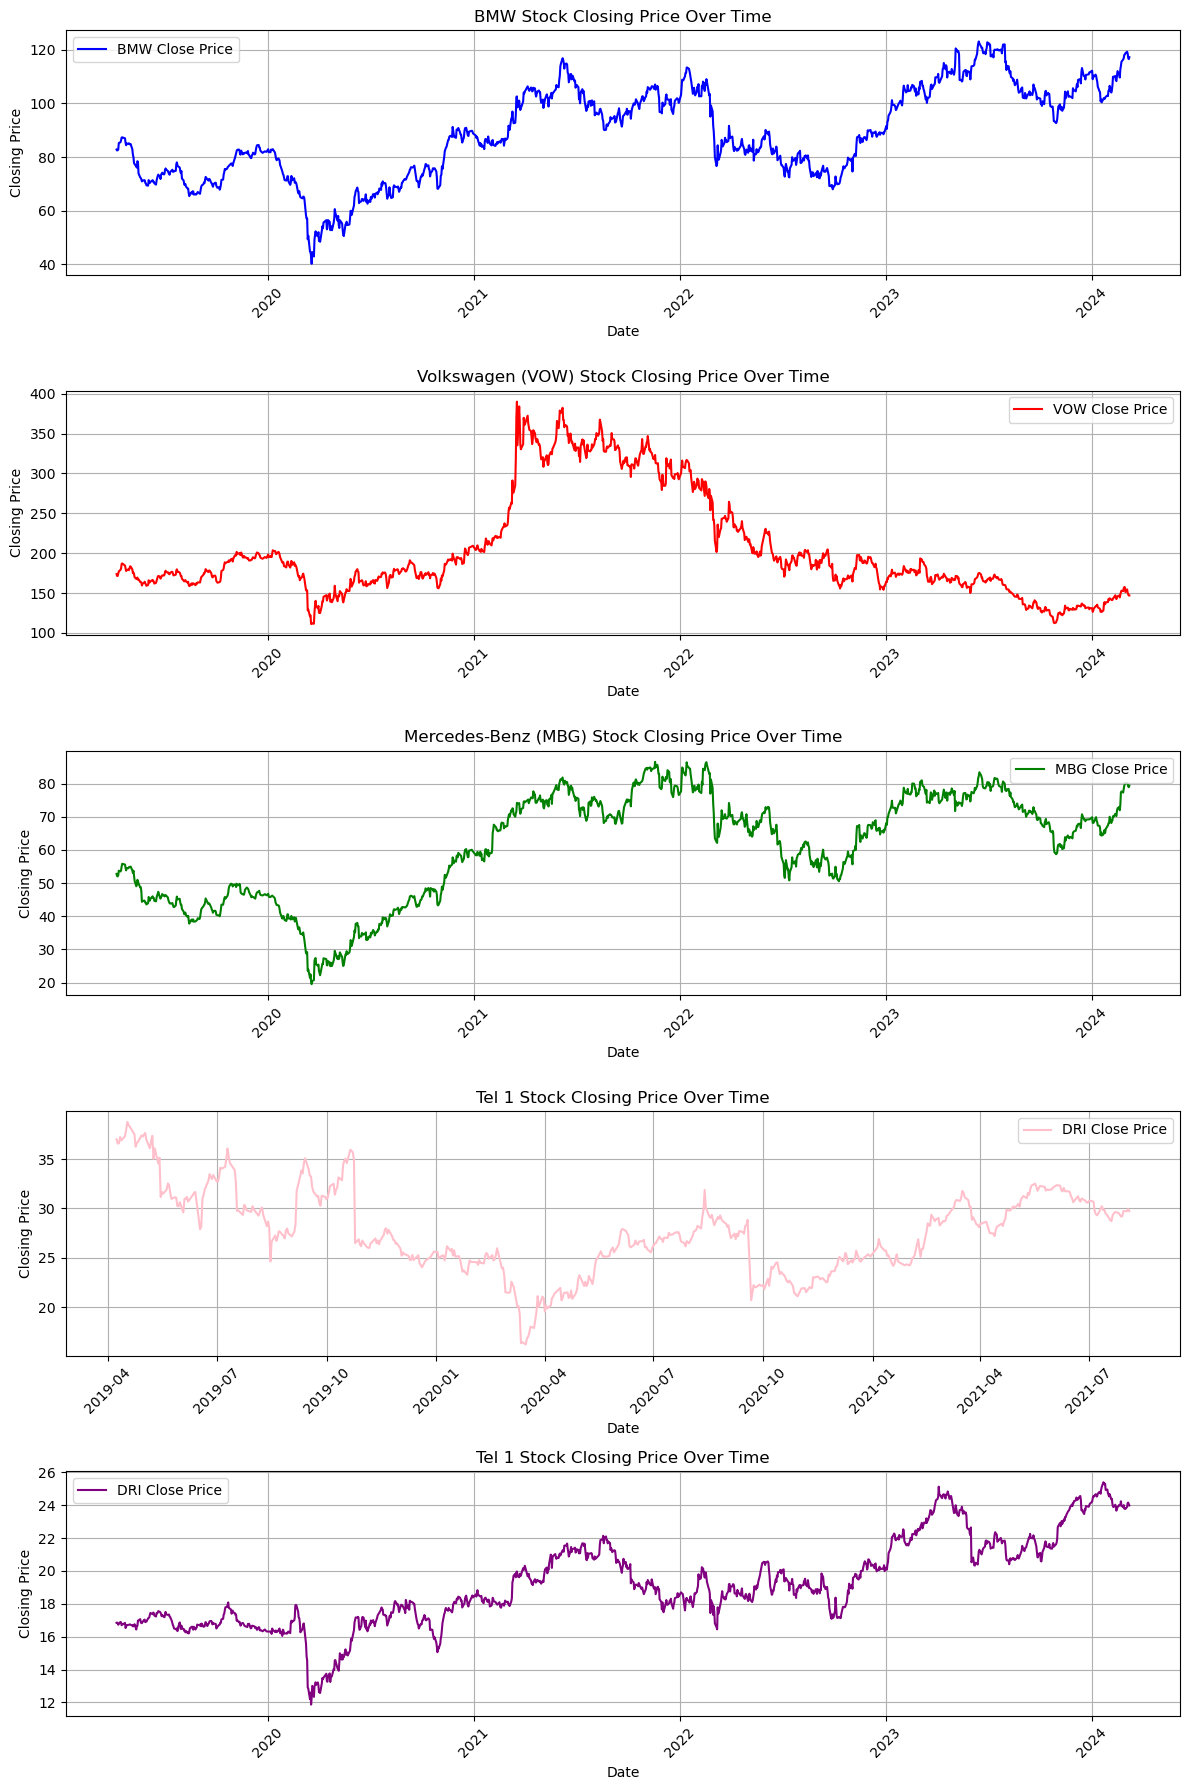

In [11]:
import matplotlib.pyplot as plt

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18))

# BMW Stock Closing Price
axes[0].plot(bmw['Date'], bmw['Close'], linestyle='-', label='BMW Close Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title('BMW Stock Closing Price Over Time')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Volkswagen (VOW) Stock Closing Price
axes[1].plot(vow['Date'], vow['Close'], linestyle='-', label='VOW Close Price', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Volkswagen (VOW) Stock Closing Price Over Time')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Mercedes-Benz (MBG) Stock Closing Price
axes[2].plot(mbg['Date'], mbg['Close'], linestyle='-', label='MBG Close Price', color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Closing Price')
axes[2].set_title('Mercedes-Benz (MBG) Stock Closing Price Over Time')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

axes[3].plot(dri['Date'], dri['Close'], linestyle='-', label='DRI Close Price', color='pink')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Closing Price')
axes[3].set_title('Tel 1 Stock Closing Price Over Time')
axes[3].legend()
axes[3].tick_params(axis='x', rotation=45)
axes[3].grid(True)

axes[4].plot(dte['Date'], dte['Close'], linestyle='-', label='DRI Close Price', color='purple')
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Closing Price')
axes[4].set_title('Tel 1 Stock Closing Price Over Time')
axes[4].legend()
axes[4].tick_params(axis='x', rotation=45)
axes[4].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### best arch model for the bmw stocks

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for Closing Price in log format')

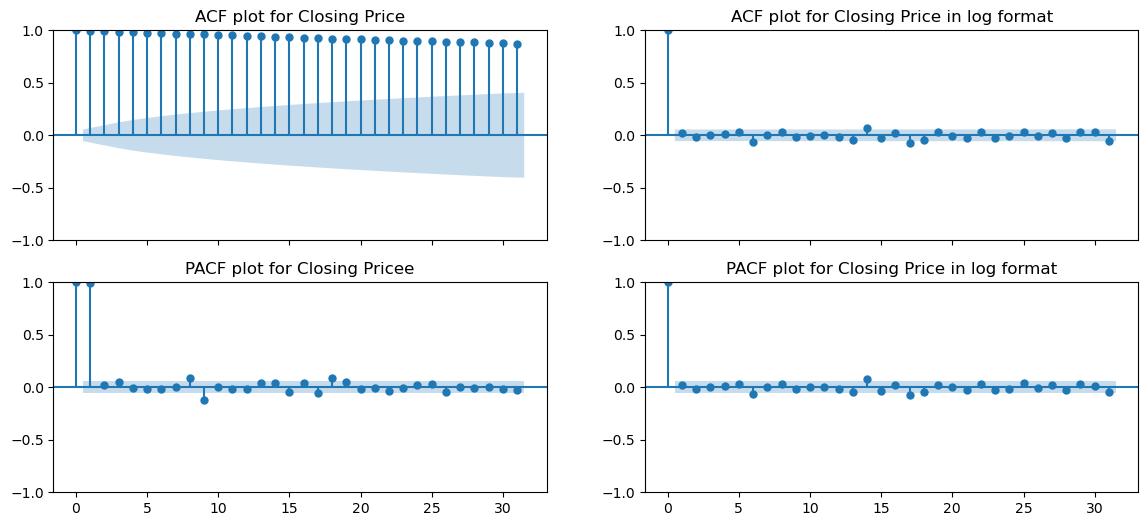

In [12]:
fig, axes=plt.subplots(2,2,figsize=(14,6),sharex=True)
plot_acf( portfolio_auto['Close'],ax=axes[0,0])
axes[0,0].set_title('ACF plot for Closing Price')
plot_pacf(portfolio_auto['Close'], ax=axes[1, 0])

axes[1,0].set_title('PACF plot for Closing Pricee')
plot_acf( portfolio_auto['log_returns'],ax=axes[0,1])
axes[0,1].set_title('ACF plot for Closing Price in log format')
plot_pacf(portfolio_auto['log_returns'], ax=axes[1, 1])

axes[1,1].set_title('PACF plot for Closing Price in log format')

In [13]:
auto_training= portfolio_auto[portfolio_auto.index<='2024-02-20']
auto_testing=portfolio_auto[portfolio_auto.index>='2024-02-20']



### get the best combination for all type of arch before computing each model


- Arch best combination for BIC and AIC

In [14]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(auto_training['log_returns'], vol='ARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(auto_training['log_returns'], vol='ARCH',lags=2 ,p=p, q=q, dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")


✅ Best (p, q): (9, 1) with AIC: 5160.306922094065
✅ Best (p, q): (4, 1) with BIC: 5220.596555877644


In [15]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(auto_training['log_returns'], vol='GARCH',p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(auto_training['log_returns'], vol='GARCH' ,p=p, q=q, dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (1, 1) with AIC: 5149.339047800354
✅ Best (p, q): (1, 1) with BIC: 5174.9493472085


In [16]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(auto_training['log_returns'], vol='EGARCH',p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(auto_training['log_returns'], vol='EGARCH' ,p=p, q=q, dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (3, 1) with AIC: 5155.247300898338
✅ Best (p, q): (1, 1) with BIC: 5180.917049218781


In [221]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
            # Ensure you use the correct dataset (bmw, not vow)
                 model = arch_model(auto_training['log_returns'], vol='GARCH',p=p, q=q ,o=o,dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
                 if model.aic < best_aic:
                     best_aic = model.aic
                     best_pq = (p, q,o)

            except Exception as e:
             print(f"❌ Error at (p={p}, q={q}, o={o}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
            # Ensure you use the correct dataset (bmw, not vow)
                 model = arch_model(auto_training['log_returns'], vol='GARCH',p=p, q=q ,o=o,dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
                 if model.bic < best_bic:
                     best_bic = model.bic
                     best_pq = (p, q, o)

            except Exception as e:
             print(f"❌ Error at (p={p}, q={q}, o={o}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (1, 2, 1) with BIC: 5143.760839646951
✅ Best (p, q): (1, 1, 1) with BIC: 5174.887558322017


- the best model by far is the GJR-GARCH with a bic and aic of 15750 and 15713.45

## GR-GARCH model SUMMARY 

In [17]:
auto_model= arch_model(auto_training['log_returns'],vol='GARCH', p=1, q=2, o=1,dist='t')
forecast_auto_m= auto_model.fit(disp='off')
print(forecast_auto_m.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2564.88
Distribution:      Standardized Student's t   AIC:                           5143.76
Method:                  Maximum Likelihood   BIC:                           5179.62
                                              No. Observations:                 1239
Date:                      Wed, Mar 12 2025   Df Residuals:                     1238
Time:                              10:35:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

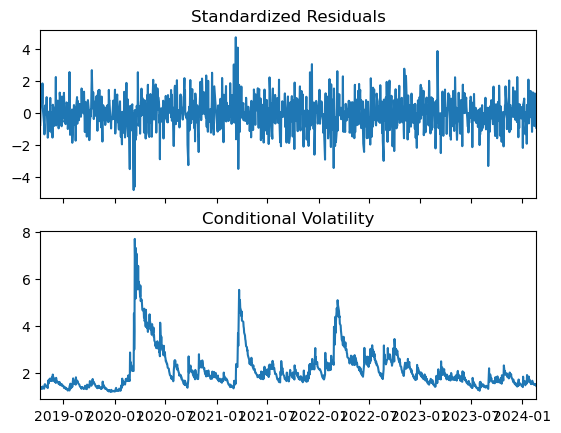

In [18]:
fig=forecast_auto_m.plot()
plt.show()

- forecast and plt

In [19]:
forecast_auto= forecast_auto_m.forecast(horizon=18)

In [20]:
auto_testing.index[-1]

Timestamp('2024-03-08 00:00:00')

In [21]:
start_date= auto_training.index[-1]
dates= pd.date_range(start=start_date,periods=18 ,freq='D')
dates

var= forecast_auto.variance.iloc[-1,:18] 
volatility= var ** 0.5

df_auto= pd.DataFrame({"dates":pd.to_datetime(dates),'var': var,"volatility":volatility})


In [22]:
start_date


Timestamp('2024-02-20 00:00:00')

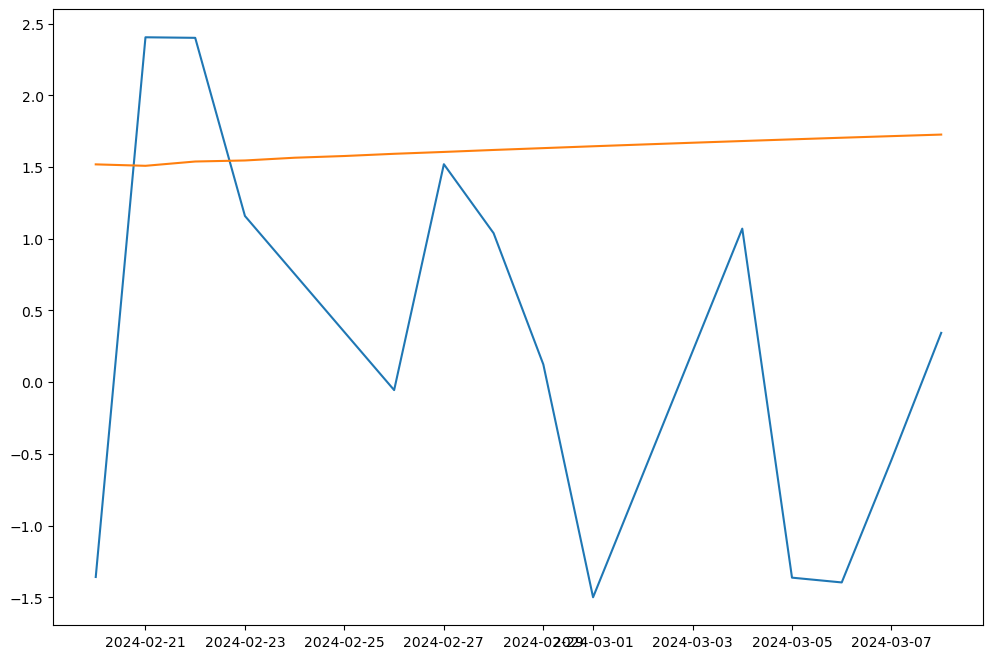

In [23]:
plt.figure(figsize=(12,8))
plt.plot(auto_testing.index, auto_testing['log_returns'])
plt.plot(df_auto['dates'],df_auto['volatility'])

In [24]:
import pandas as pd
from arch import arch_model

class GARCHForecaster:
    def __init__(self, log_returns, p=1, q=1, o=0, forecast_horizon=2,vol='Garch',dist='t'):
        """
        Initialize the GARCH forecaster.
        :param log_returns: Series of log returns
        :param p: Lag order for past variances
        :param q: Lag order for past squared returns
        :param forecast_horizon: Number of days to forecast ahead
        """
        self.log_returns = log_returns.dropna()
        self.p = p
        self.q = q
        self.o=o
        self.forecast_horizon = forecast_horizon
        self.model = None
        self.fitted_model = None
        self.vol= vol
    
    def fit_model(self):
        """Fits a GARCH model to the log returns."""
        self.model = arch_model(self.log_returns, vol=self.vol, p=self.p, q=self.q,o=self.o)
        self.fitted_model = self.model.fit(disp="off")
    
    def forecast_volatility(self):
    
        if self.fitted_model is None:
            raise ValueError("Model not fitted. Call fit_model() first.")

    # Get forecasts
        forecasts = self.fitted_model.forecast(horizon=self.forecast_horizon)

    # Debug: Print forecasts DataFrame
        print("\nDEBUG: Forecasted Variance DataFrame")
        print(forecasts.variance)

    # Ensure there's data before accessing last row
        if forecasts.variance.empty:
            raise ValueError("Forecasted variance is empty. Check the model input data.")

    # Extract variance safely
        try:
             predicted_variance = forecasts.variance.iloc[-1]  # Last available row
        except IndexError:
                predicted_variance = forecasts.variance.iloc[0]  # Fallback to first row

    # Convert variance to volatility (standard deviation)
        predicted_volatility = predicted_variance ** 0.5  

        return predicted_volatility

    def update_data(self, new_log_return):
         self.log_returns = pd.concat([self.log_returns, pd.Series([new_log_return])], ignore_index=True).dropna()


    def retrain_model(self):
        """Re-trains the GARCH model with the updated data."""
        self.fit_model()

In [25]:
auto_F= GARCHForecaster(log_returns=portfolio_auto['log_returns'],p=1, q=2,o=1,forecast_horizon=2,dist='t')
auto_F.fit_model()  # Fit the model first
auto_date= pd.date_range(start= portfolio_auto.index[-1], freq= 'D', periods=2)
volatility_forecast = auto_F.forecast_volatility()
pd.DataFrame({'Date':auto_date,'vol':volatility_forecast})




DEBUG: Forecasted Variance DataFrame
                 h.1       h.2
Date                          
2024-03-08  2.012051  2.216201


,Date,vol
h.1,2024-03-08,1.418468
h.2,2024-03-09,1.488691


In [26]:
volatility_forecast

h.1    1.418468
h.2    1.488691
Name: 2024-03-08 00:00:00, dtype: float64

- find optimal model for telephonic portfolio companies and compute it

In [27]:
tel_training= portfolio_tel[portfolio_tel.index<='2024-02-20']
tel_testing=portfolio_tel[portfolio_tel.index>='2024-02-20']



/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for Closing Price in log format')

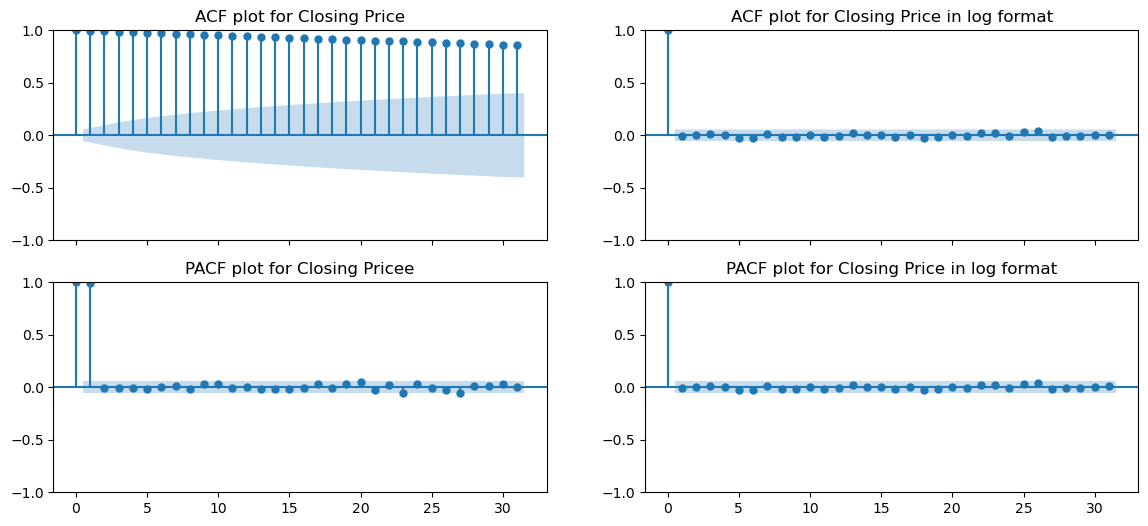

In [28]:
fig, axes=plt.subplots(2,2,figsize=(14,6),sharex=True)
plot_acf( portfolio_tel['Close'],ax=axes[0,0])
axes[0,0].set_title('ACF plot for Closing Price')
plot_pacf(portfolio_tel['Close'], ax=axes[1, 0])

axes[1,0].set_title('PACF plot for Closing Pricee')
plot_acf( portfolio_tel['log_returns'],ax=axes[0,1])
axes[0,1].set_title('ACF plot for Closing Price in log format')
plot_pacf(portfolio_tel['log_returns'], ax=axes[1, 1])

axes[1,1].set_title('PACF plot for Closing Price in log format')

In [29]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(tel_training['log_returns'], vol='ARCH' ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(tel_training['log_returns'], vol='ARCH' ,p=p, q=q, dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (2, 1) with AIC: 4492.582712596206
✅ Best (p, q): (1, 1) with BIC: 4517.781326053773


In [30]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(tel_training['log_returns'], vol='GARCH' ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(tel_training['log_returns'], vol='GARCH' ,p=p, q=q, dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

✅ Best (p, q): (1, 5) with AIC: 4501.579476922747
✅ Best (p, q): (1, 4) with BIC: 4543.5756592206835


In [359]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(tel_training['log_returns'], vol='EGARCH' ,p=p, q=q, dist='t').fit(disp='off')  # 
            
            # Store best (p, q) based on lowest AIC
            if model.aic < best_aic:
                best_aic = model.aic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        try:
            # Ensure you use the correct dataset (bmw, not vow)
            model = arch_model(tel_training['log_returns'], vol='EGARCH' ,p=p, q=q, dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_pq = (p, q)

        except Exception as e:
            print(f"❌ Error at (p={p}, q={q}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


✅ Best (p, q): (8, 1) with AIC: 4439.035651182302


/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


✅ Best (p, q): (1, 1) with BIC: 4474.45341365663


In [349]:

# Initialize best AIC and best (p, q) values
best_aic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
            # Ensure you use the correct dataset (bmw, not vow)
                 model = arch_model(tel_training['log_returns'], vol='GARCH',p=p, q=q ,o=o,dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
                 if model.aic < best_aic:
                     best_aic = model.aic
                     best_pq = (p, q,o)

            except Exception as e:
             print(f"❌ Error at (p={p}, q={q}, o={o}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with AIC: {best_aic}")
else:
    print("❌ No valid model found.")


# Initialize best BIC and best (p, q) values
best_bic = np.inf
best_pq = None  

for p in range(1, 10):  # Test p from 1 to 9
    for q in range(1, 6):  # Test q from 1 to 5
        for o in range(1,3):
            try:
            # Ensure you use the correct dataset (bmw, not vow)
                 model = arch_model(tel_training['log_returns'], vol='GARCH',p=p, q=q ,o=o,dist='t').fit(disp='off')  # Changed to GARCH
            
            # Store best (p, q) based on lowest AIC
                 if model.bic < best_bic:
                     best_bic = model.bic
                     best_pq = (p, q, o)

            except Exception as e:
             print(f"❌ Error at (p={p}, q={q}, o={o}): {e}")  # Print errors for debugging
            continue

# Display best model parameters
if best_pq:
    print(f"✅ Best (p, q): {best_pq} with BIC: {best_bic}")
else:
    print("❌ No valid model found.")

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
P

✅ Best (p, q): (1, 1, 1) with AIC: 4463.160256091698


/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
P

✅ Best (p, q): (1, 1, 1) with BIC: 4493.892615381473


/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [31]:
tel_mod= GARCHForecaster(log_returns=portfolio_tel['log_returns'],p=1, q=5,forecast_horizon=2,vol='GARCH',dist='t')
tel_mod_fore=tel_mod.fit_model()

tel_date= pd.date_range(start= portfolio_tel.index[-1], freq= 'D', periods=2)
volatility_forecast_t = tel_mod.forecast_volatility()
pd.DataFrame({'Date':tel_date,'vol':volatility_forecast_t})



DEBUG: Forecasted Variance DataFrame
                  h.1        h.2
Date                            
2024-03-08  10.051319  10.051404


,Date,vol
h.1,2024-03-08,3.170382
h.2,2024-03-09,3.170395


In [32]:
t_model= arch_model(tel_training['log_returns'],vol='GARCH', p=1,q=5)
forecast_tel_m= t_model.fit(disp='off')
print(forecast_tel_m.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3149.51
Distribution:                  Normal   AIC:                           6315.01
Method:            Maximum Likelihood   BIC:                           6355.99
                                        No. Observations:                 1239
Date:                Wed, Mar 12 2025   Df Residuals:                     1238
Time:                        10:37:56   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0569  9.310e-02     -0.611      0.541 [ -0.239,  0.12

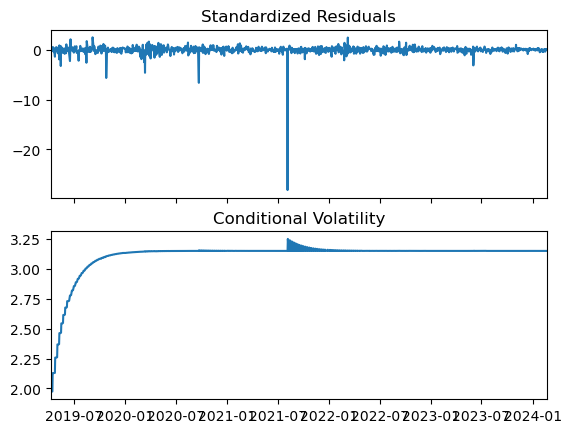

In [35]:
fig=forecast_tel_m.plot()
plt.show()

In [33]:
fore_tel_m= forecast_tel_m.forecast(horizon=18)
fore_tel_m.variance.iloc[-1]**0.5

h.01    3.151429
h.02    3.151548
h.03    3.151520
h.04    3.151530
h.05    3.151545
h.06    3.151549
h.07    3.151655
h.08    3.151630
h.09    3.151639
h.10    3.151653
h.11    3.151656
h.12    3.151750
h.13    3.151728
h.14    3.151736
h.15    3.151748
h.16    3.151752
h.17    3.151835
h.18    3.151816
Name: 2024-02-20 00:00:00, dtype: float64

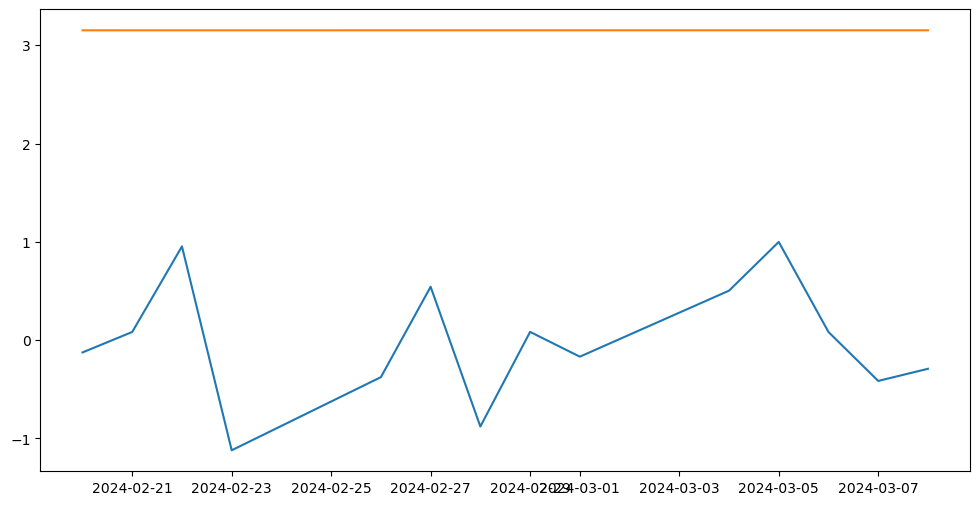

In [34]:

start_date= tel_training.index[-1]
dates= pd.date_range(start=start_date,periods=18 ,freq='D')
dates

var= fore_tel_m.variance.iloc[-1] 
volatility= var ** 0.5

df_tel= pd.DataFrame({"dates":pd.to_datetime(dates),'var': var,"volatility":volatility})


plt.figure(figsize=(12,6))
plt.plot(tel_testing.index,tel_testing['log_returns'])
plt.plot(df_tel['dates'],df_tel['volatility'])
